In [1]:
import numpy as np
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Load VGG16 model (pre-trained on ImageNet)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze initial layers of VGG16
for layer in vgg_model.layers[:15]:
    layer.trainable = False

# Create a new model on top of VGG16
model_frozen = Sequential()
model_frozen.add(vgg_model)
model_frozen.add(Flatten())
model_frozen.add(Dense(256, activation='relu'))
model_frozen.add(Dropout(0.5))
model_frozen.add(Dense(10, activation='softmax'))

# Compile the model with frozen layers
model_frozen.compile(optimizer=Adam(lr=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model with frozen layers
history_frozen = model_frozen.fit(x_train, y_train,
                                  epochs=10,
                                  batch_size=128,
                                  validation_data=(x_test, y_test))


58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
391/391 [==============================] - 23s 36ms/step - loss: 1.2517 - accuracy: 0.5626 - val_loss: 0.8803 - val_accuracy: 0.6962
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.8543 - accuracy: 0.7133 - val_loss: 0.8068 - val_accuracy: 0.7244
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 0.7307 - accuracy: 0.7535 - val_loss: 0.7935 - val_accuracy: 0.7312
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.6508 - accuracy: 0.7777 - val_loss: 0.7967 - val_accuracy: 0.7330
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 0.5785 - accuracy: 0.8044 - val_loss: 0.7933 - val_accuracy: 0.7409
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.5080 - accuracy: 0.8261 - val_loss: 0.7887 - val_accuracy: 0.7409
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.4538 - accuracy: 0.8455 - val_loss: 0.8198 - val_accuracy:

In [4]:
# Unfreeze all layers of VGG16
for layer in vgg_model.layers:
    layer.trainable = True

# Create a new model on top of VGG16
model_unfrozen = Sequential()
model_unfrozen.add(vgg_model)
model_unfrozen.add(Flatten())
model_unfrozen.add(Dense(256, activation='relu'))
model_unfrozen.add(Dropout(0.5))
model_unfrozen.add(Dense(10, activation='softmax'))

# Compile the model with unfrozen layers
model_unfrozen.compile(optimizer=Adam(lr=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model with unfrozen layers
history_unfrozen = model_unfrozen.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=128,
                                      validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 31s 61ms/step - loss: 2.3638 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 22s 57ms/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 22s 56ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 22s 55ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 22s 56ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 22s 55ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 22s 55ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy:

In [5]:
# Create a new model for training from scratch
model_scratch = Sequential()
model_scratch.add(Flatten(input_shape=(32, 32, 3)))
model_scratch.add(Dense(256, activation='relu'))
model_scratch.add(Dropout(0.5))
model_scratch.add(Dense(10, activation='softmax'))

# Compile the model trained from scratch
model_scratch.compile(optimizer=Adam(lr=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model from scratch
history_scratch = model_scratch.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=128,
                                    validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 3s 5ms/step - loss: 2.1979 - accuracy: 0.1794 - val_loss: 2.0174 - val_accuracy: 0.2978
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0628 - accuracy: 0.2194 - val_loss: 1.9175 - val_accuracy: 0.3070
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0353 - accuracy: 0.2258 - val_loss: 1.8914 - val_accuracy: 0.3214
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 2.0243 - accuracy: 0.2295 - val_loss: 1.9040 - val_accuracy: 0.3347
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 2.0160 - accuracy: 0.2372 - val_loss: 1.8751 - val_accuracy: 0.3395
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0110 - accuracy: 0.2359 - val_loss: 1.8760 - val_accuracy: 0.3182
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0080 - accuracy: 0.2379 - val_loss: 1.8637 - val_accuracy: 0.3396
Epoch 

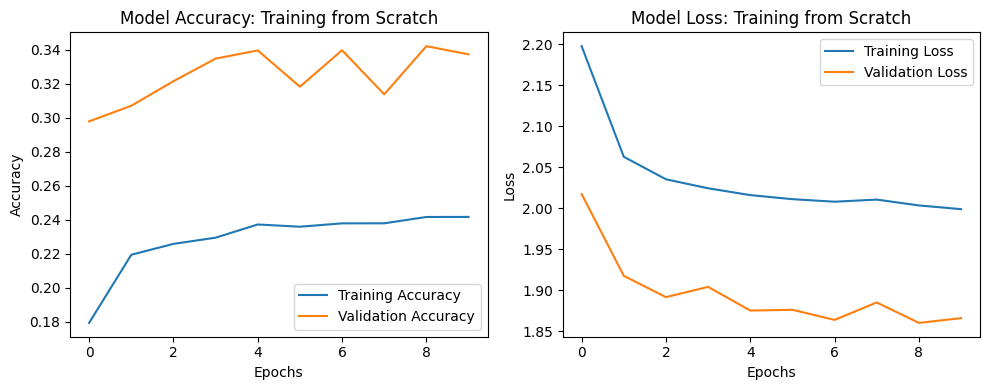

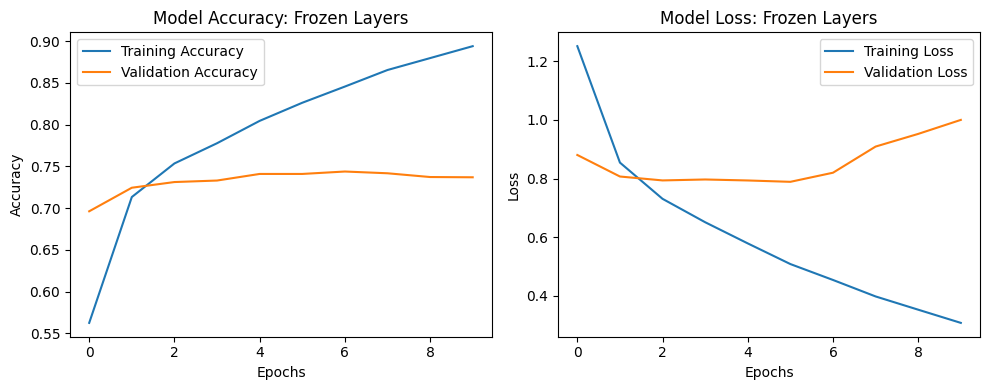

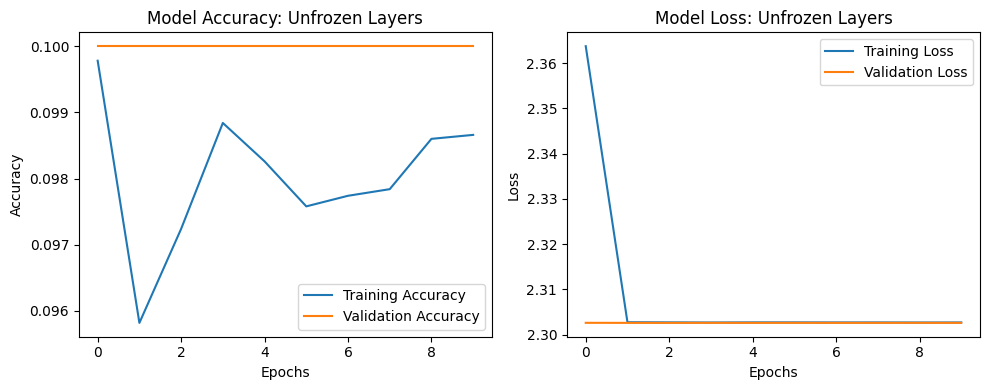

In [6]:
import matplotlib.pyplot as plt

# Plotting the training history for Transfer Learning and Training from Scratch models
def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy: ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss: ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Visualize training history for Training from Scratch model
plot_training_history(history_scratch, 'Training from Scratch')

# Visualize training history for Frozen model
plot_training_history(history_frozen, 'Frozen Layers')

# Visualize training history for Unfrozen model
plot_training_history(history_unfrozen, 'Unfrozen Layers')


313/313 [==============================] - 2s 7ms/step


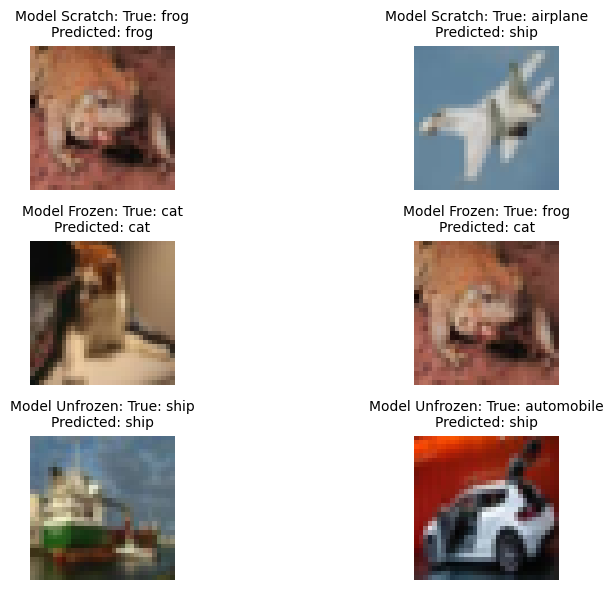

In [17]:
# Define CIFAR-10 class labels
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

true_labels = np.argmax(y_test, axis=1)
# Evaluate the model trained from scratch on the test set and store predictions
predictions_scratch = model_scratch.predict(x_test)
predicted_labels_scratch = np.argmax(predictions_scratch, axis=1)

# Identify correct and incorrect predictions for the model trained from scratch
correct_indices_scratch = np.where(predicted_labels_scratch == true_labels)[0]
incorrect_indices_scratch = np.where(predicted_labels_scratch != true_labels)[0]

# Evaluate the model with frozen layers on the test set and store predictions
predictions_frozen = model_frozen.predict(x_test)
predicted_labels_frozen = np.argmax(predictions_frozen, axis=1)

# Identify correct and incorrect predictions for the model with frozen layers
correct_indices_frozen = np.where(predicted_labels_frozen == true_labels)[0]
incorrect_indices_frozen = np.where(predicted_labels_frozen != true_labels)[0]

# Evaluate the model with unfrozen layers on the test set and store predictions
predictions_unfrozen = model_unfrozen.predict(x_test)
predicted_labels_unfrozen = np.argmax(predictions_unfrozen, axis=1)

# Identify correct and incorrect predictions for the model with unfrozen layers
correct_indices_unfrozen = np.where(predicted_labels_unfrozen == true_labels)[0]
incorrect_indices_unfrozen = np.where(predicted_labels_unfrozen != true_labels)[0]

# Visualize correct and incorrect predictions for the three models
plt.figure(figsize=(10, 6))

# Model trained from scratch
plt.subplot(3, 2, 1)
for i in range(5):
    plt.imshow(x_test[correct_indices_scratch[i]], interpolation='nearest')
    plt.title(f'Model Scratch: True: {cifar10_labels[true_labels[correct_indices_scratch[i]]]}\nPredicted: {cifar10_labels[predicted_labels_scratch[correct_indices_scratch[i]]]}', fontsize=10)
    plt.axis('off')

plt.subplot(3, 2, 2)
for i in range(5):
    plt.imshow(x_test[incorrect_indices_scratch[i]], interpolation='nearest')
    plt.title(f'Model Scratch: True: {cifar10_labels[true_labels[incorrect_indices_scratch[i]]]}\nPredicted: {cifar10_labels[predicted_labels_scratch[incorrect_indices_scratch[i]]]}', fontsize=10)
    plt.axis('off')

# Model with frozen layers
plt.subplot(3, 2, 3)
for i in range(5):
    plt.imshow(x_test[correct_indices_frozen[i]], interpolation='nearest')
    plt.title(f'Model Frozen: True: {cifar10_labels[true_labels[correct_indices_frozen[i]]]}\nPredicted: {cifar10_labels[predicted_labels_frozen[correct_indices_frozen[i]]]}', fontsize=10)
    plt.axis('off')

plt.subplot(3, 2, 4)
for i in range(5):
    plt.imshow(x_test[incorrect_indices_frozen[i]], interpolation='nearest')
    plt.title(f'Model Frozen: True: {cifar10_labels[true_labels[incorrect_indices_frozen[i]]]}\nPredicted: {cifar10_labels[predicted_labels_frozen[incorrect_indices_frozen[i]]]}', fontsize=10)
    plt.axis('off')

# Model with unfrozen layers
plt.subplot(3, 2, 5)
for i in range(5):
    plt.imshow(x_test[correct_indices_unfrozen[i]], interpolation='nearest')
    plt.title(f'Model Unfrozen: True: {cifar10_labels[true_labels[correct_indices_unfrozen[i]]]}\nPredicted: {cifar10_labels[predicted_labels_unfrozen[correct_indices_unfrozen[i]]]}', fontsize=10)
    plt.axis('off')

plt.subplot(3, 2, 6)
for i in range(5):
    plt.imshow(x_test[incorrect_indices_unfrozen[i]], interpolation='nearest')
    plt.title(f'Model Unfrozen: True: {cifar10_labels[true_labels[incorrect_indices_unfrozen[i]]]}\nPredicted: {cifar10_labels[predicted_labels_unfrozen[incorrect_indices_unfrozen[i]]]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

